# Contratos adjudicados y formalizados del Gobierno de Canarias
Contratos, adjudicados y formalizados, por las entidades y órganos de contratación del Gobierno de Canarias, y publicados en la plataforma de contratación del sector público, desde el 1 de enero de 2020 hasta el primer trimestre de 2023.

ACCESO A LA FUENTE DE DATOS:
https://datos.canarias.es/catalogos/general/dataset/contratos-adjudicados-y-formalizados-del-gobierno-de-canarias

Datos facilitados por Consejería de Hacienda, Presupuestos y Asuntos Europeos del Gobierno de Canarias.

### OBJETIVOS

Trataremos de limpiar y ordenar el conjunto de datos para dar respuesta a las siguientes preguntas:


- [¿Cuál es el monto total de contratos adjudicados y formalizados en el período de tiempo estudiado?](#pregunta1)


- [¿Cuántos contratos se adjudicaron en cada uno de los años del período de tiempo estudiado?](#pregunta2)


- Antes de responder la siguiente pregunta, analizamos la distibución de la variable "`importe_ofertado`" [aquí](#analisis)


- [¿Qué empresas han obtenido los contratos de mayor valor en el período de tiempo estudiado y cuál es su porcentaje sobre el total?](#pregunta3)


- [¿Qué empresas han obtenido el mayor número de contratos adjudicados y cuál es su porcentaje respecto al total?](#pregunta4)


- [Resumen.](#resumen)


- [Consideraciones finales.](#consideraciones)

##### Cargando los datos
Primero, es necesario cargar los datos en Jupyter Notebook. Usamos la libreria Pandas para importar los datos del archivo con formato CSV, visualizamos las cinco primeras filas de la tabla de datos.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\josue\Desktop\Data Science\Codecademy\Projects\Contratos adjudicados y formalizados del Gobierno de Canarias\contratos_desde_01_01_2021.csv", sep=';')

df.head()

,objeto_contrato,entidad_adjudicadora,procedimiento_contratacion,tramitacion_tipo,lote,adjudicacion_fecha,adjudicataria_nif,importe_ofertado,expediente_numero,licitacion_enlace,...,publicacion_fecha,publicacion_medio,licitacion_resultado,pliego_enlace,perfil_contratante_enlace,financiacion_europea,fuente_financiacion_id,fuente_financiacion,localizador_programa_ue,formula_revision_precios
0,"Servicio de ""Actualización de los Mapas Estra...",Dirección General de Infraestructura Viaria de...,Abierto,Ordinaria,_Z,2021/03/14 00:00:00.000,A39074877,"165815,2",OP-05/2018 Servicio Actualización Mapas Ruidos,https://contrataciondelestado.es/wps/poc?uri=d...,...,2018/12/29 00:00:00.000,DOUE,Adjudicado,https://contrataciondelestado.es/wps/wcm/conne...,https://contrataciondelestado.es/sindicacion/C...,NO,_U,_U,_U,_U
1,Suministro con instalación y puesta en marcha ...,Instituto Tecnológico de Canarias S.A.,Abierto,Ordinaria,_Z,2020/01/22 00:00:00.000,B76248962,"103000,0",0867/2019,https://contrataciondelestado.es/wps/poc?uri=d...,...,2020/01/22 00:00:00.000,Perfil del Contratante,Adjudicado,https://contrataciondelestado.es/wps/wcm/conne...,https://contrataciondelestado.es/sindicacion/C...,SI,_U,_U,Programa Operativo FEDER Canarias 2014-2020,No existirá revisión de precios en el presente...
2,El objeto del contrato es la prestación de un...,"Dirección General de Ordenación, Innovación y ...",Abierto simplificado,Ordinaria,_Z,2020/01/22 00:00:00.000,A78562246,"31860,0",2/2019,https://contrataciondelestado.es/wps/poc?uri=d...,...,2020/01/22 00:00:00.000,Perfil del Contratante,Adjudicado,https://contrataciondelestado.es/wps/wcm/conne...,https://contrataciondelestado.es/sindicacion/C...,NO,_U,_U,_U,"Dada la naturaleza del servicio, y de conformi..."
3,Suministro productos laboratorio: set DNTPS y ...,Presidencia del Instituto canario de Investiga...,Contrato menor,Ordinaria,_Z,2020/07/10 00:00:00.000,A35368539,"370,5",RC0000095125/2020,https://contrataciondelestado.es/wps/poc?uri=d...,...,2020/09/11 00:00:00.000,Perfil del Contratante,Adjudicado,_U,https://contrataciondelestado.es/sindicacion/C...,NO,_U,_U,_U,_U
4,Suministro de medicamentos de uso humano de va...,Gerencia de Servicios Sanitarios del Área de S...,Negociado sin publicidad,Ordinaria,1,2020/01/08 00:00:00.000,A60805785,"18960,0",52/F/20/SU/GE/N/016,https://contrataciondelestado.es/wps/poc?uri=d...,...,2020/01/08 00:00:00.000,Perfil del Contratante,Adjudicado,https://contrataciondelestado.es/wps/wcm/conne...,https://contrataciondelestado.es/sindicacion/C...,_U,_U,_U,_U,_U


El formato de un "Dataframe" puede compararse con los diccionarios de Python. Las claves son los nombres de las columnas y los valores son las **series**. Su estructura puede considerarse similar a la de una hoja de cálculo de Excel.

Cada fila contiene datos específicos de varias columnas, que son variables. El nombre de las filas de un DataFrame se llama **index** que, por defecto, empieza siempre por 0.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42831 entries, 0 to 42830
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   objeto_contrato             42831 non-null  object
 1   entidad_adjudicadora        42831 non-null  object
 2   procedimiento_contratacion  42831 non-null  object
 3   tramitacion_tipo            42831 non-null  object
 4   lote                        42831 non-null  object
 5   adjudicacion_fecha          42831 non-null  object
 6   adjudicataria_nif           42831 non-null  object
 7   importe_ofertado            42831 non-null  object
 8   expediente_numero           42831 non-null  object
 9   licitacion_enlace           42831 non-null  object
 10  licitacion_estado           42831 non-null  object
 11  clasificacion_cpv           42831 non-null  object
 12  contrato_tipo               42831 non-null  object
 13  publicacion_fecha           42831 non-null  ob

##### Información de los datos


A grandes rasgos podemos observar que:

- Contiene 23 columnas y 42.830 filas.

- La mayoría de las variables son categóricas.

- La columma `"importe_ofertado"` y `"adjudicacion_fecha"` no están en el formato que nos interesa.

- Los nombres de las columnas son conscistentes por lo que no necesitamos aplicar cambios.

A continuación, aplicaremos el metodo `"describe"` de la libreria Pandas para resumir los principales datos estadísticos.

In [4]:
df.describe(include='all')

,objeto_contrato,entidad_adjudicadora,procedimiento_contratacion,tramitacion_tipo,lote,adjudicacion_fecha,adjudicataria_nif,importe_ofertado,expediente_numero,licitacion_enlace,...,publicacion_fecha,publicacion_medio,licitacion_resultado,pliego_enlace,perfil_contratante_enlace,financiacion_europea,fuente_financiacion_id,fuente_financiacion,localizador_programa_ue,formula_revision_precios
count,42831,42831,42831,42831,42831,42831,42831,42831,42831,42831,...,42831,42831,42831,42831,42831,42831,42831,42831,42831,42831
unique,32948,167,8,4,317,1095,9268,25187,37067,37549,...,1026,3,5,3788,37612,3,8,8,503,145
top,Suministro de medicamentos de uso humano Tipo ...,Instituto Tecnológico de Canarias S.A.,Contrato menor,Ordinaria,_Z,2021/01/21 00:00:00.000,_U,_U,52/F/22/SU/GE/T/002,https://contrataciondelestado.es/wps/poc?uri=d...,...,2023/03/17 00:00:00.000,Perfil del Contratante,Adjudicado,_U,https://contrataciondelestado.es/sindicacion/C...,NO,_U,_U,_U,_U
freq,388,6337,28732,33700,36191,333,1298,1298,144,144,...,1405,40034,40126,35903,144,36916,40463,40463,40058,41611


Para contestar las preguntas objetivo, solamente necesitaremos las siguientes variables de nuestra tabla de datos:

- adjudicacion_fecha: Fecha de adjudicación del contrato.
- adjudicataria_nif: NIF empresa a la que se adjudica y se formaliza el contrato.
- importe_ofertado: Importe finalmente ofertado y aceptado.

### ¿Cuál es el monto total de contratos adjudicados y formalizados en el período de tiempo estudiado? <a class="anchor" id="pregunta1"></a>

In [5]:
len(df)

42831

In [6]:
df.adjudicataria_nif.nunique()

9268

Desde el 1 de enero de 2020 hasta el primer trimestre de 2023 se han adjudicado y formalizado 42.831 contratos por el Gobierno de Canarias. Y un total de 9.268 valores distintos en la variable `"adjudicataria_nif"`.

### ¿Cuántos contratos se adjudicaron en cada uno de los años del período de tiempo estudiado? <a class="anchor" id="pregunta2"></a>

Para agrupar los contratos por año debemos convertir a formato fecha la columna `"adjudicacion fecha"` y posteriormente crear una nueva columna extrayendo solamente el año a la cual llamaremos `"adjudicacion_año"`.

In [7]:
# Convertir 'adjudicacon_fecha' a formato fecha:
df.adjudicacion_fecha = pd.to_datetime(df.adjudicacion_fecha)

# Extraer el año en una nueva columna 'adjudicacion_año':
df['adjudicacion_año'] = df.adjudicacion_fecha.dt.year
df.adjudicacion_año = df.adjudicacion_año.astype(str)

# Contar valores por año:
print(df.adjudicacion_año.value_counts())

2021    15866
2022    13691
2020    10676
2023     2598
Name: adjudicacion_año, dtype: int64


In [8]:
# Rango de fechas de adjudicación de contratos:
print(df.adjudicacion_fecha.max())
print(df.adjudicacion_fecha.min())

2023-03-31 00:00:00
2020-01-01 00:00:00


Para representar los datos obtenidos, es conveniente representarlos graficamente para que resulte más directa e intuitiva su interpretación. Para ello, usaremos dos de las librerias más conocidas.

In [9]:
# importar librerias para crear graficos:
import matplotlib.pyplot as plt
import seaborn as sns

<function matplotlib.pyplot.clf()>

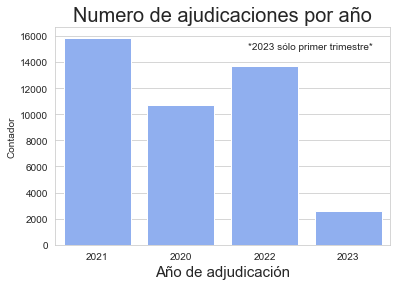

In [10]:
# Aplicamos un estilo general a todos los gráficos con la libreria seaborn:
sns.set_style("whitegrid")

sns.countplot(x=df.adjudicacion_año, color='#80aaff')
plt.title('Numero de ajudicaciones por año', fontsize=20)
plt.xlabel('Año de adjudicación', fontsize=15)
plt.ylabel('Contador')
plt.text(1.8, 15000, '*2023 sólo primer trimestre*')
plt.show
plt.clf

El rango en el que se formalizan y se adjudican los contratos comienzan desde el 1 de enero de 2020 hasta el 31 de marzo de 2023. Los contratos adjudicados anualmente desde 2020 hasta el primer trimestre de 2023 son 15.866, 13.691, 10.676, 2.598 respectivamente.

##### Un paréntesis con las preguntas objetivo para obsevar como se distribuyen los valores de la variable "importe_ofertado" <a class="anchor" id="analisis"></a>

Usamos el metodo `"value_counts"` de Pandas para observar cuantas veces se repiten los mismos valores.

In [11]:
df.importe_ofertado.value_counts()

_U          1298
0,0          300
14000,0      276
14900,0      246
14950,0      152
            ... 
4352,0         1
6823,89        1
5174,85        1
3643,2         1
183150,0       1
Name: importe_ofertado, Length: 25187, dtype: int64

La variable `'importe_ofertado'` ofrece los datos en formato cadena y para el estudio nos interesa pasarlos a formato de número. Además, el valor con más frecuencia es `'_U'` repitiendose casi 1.300 veces en un total de 42.831 registros. Tras acceder al diccionario ofrecido por la fuente de datos (Canarias Datos Abiertos) el valor "_U" siginifica "datos desconocido o que no consta".

Vamos a optar por reemplazar el valor `"_U"` por el valor `"0.0"` y luego pasaremos todos los datos al formato número entero (`float`). Así, coseguiremos limpiar los valores para poder aplicar el metodo EDA (Análisis Exploratorio de Datos, siglas del Inglés). 

In [12]:
# Reemplazar el valor "_U" y convertir a formato número entero:
df.importe_ofertado = df.importe_ofertado.replace('_U','0,0')
df.importe_ofertado = df.importe_ofertado.str.replace(',', '.').astype(float)

Principales datos estadisticos de la variable `'importe_ofertado'` y comprobación de su distribución.

In [13]:
df.importe_ofertado.describe()

count    4.283100e+04
mean     6.145250e+04
std      9.006410e+05
min      0.000000e+00
25%      4.999350e+02
50%      3.456000e+03
75%      1.443750e+04
max      8.926544e+07
Name: importe_ofertado, dtype: float64

<AxesSubplot:xlabel='importe_ofertado', ylabel='Count'>

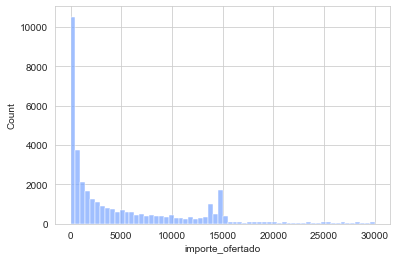

In [14]:
sns.histplot(x=df.importe_ofertado[df.importe_ofertado < 30000], color='#80aaff')

El rango de la muestra va desde 0 hasta 89.265.440 euros. La mediana es de 3.456 euros, un valor muy alejado del valor medio 61.452,5 euros, por ello, podemos confirmar que se trata de una **distribución fuertemente sesgada a la derecha**. Además, este resultado se muestra a través del histograma, el cual se ha tenido que limitar a 30.000€ (excluyendo los valores atípicos) para poder realizar una representación adecuada.

Cuando se trabaja con una distribución fuertemente sesgada a la derecha, existen diversas técnicas que se pueden utilizar para analizar y comprender mejor los datos. En este caso, **aplicaremos una transformación logarítmica**. Esto puede ayudar a reducir el sesgo y hacer que los datos se distribuyan de manera más uniforme.

In [15]:
# necesitamos la libreria numpy:
import numpy as np

In [16]:
# aplicamos una función lambda para asegurarnos de que los valores negativos o ceros se conviertan en valores positivos cercanos a cero antes de aplicar la transformación logarítmica y luego guardamos en una nueva tabla llamada 'df_no_cero':
df_no_cero = df.importe_ofertado.apply(lambda x: max(x, 0.0001))

# Aplicar la transformación logarítmica y guardar en df_no_cero_log
df_no_cero_log = np.log(df_no_cero)

<AxesSubplot:xlabel='importe_ofertado', ylabel='Count'>

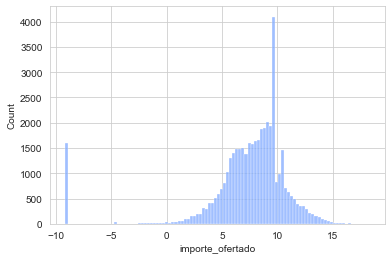

In [17]:
sns.histplot(x=df_no_cero_log, bins=100, color='#80aaff')

Después de aplicar una transformación logarítmica, el histograma resultante muestra una distribución normal, esto indica que la transformación logarítmica ha sido efectiva para reducir la asimetría y que se pueden aplicar técnicas estadísticas paramétricas que requieren normalidad.

Aplicar técnicas de inferencia o predictivas no es el objetivo de este proyecto. En este apartado solamente se muestra como se debe adaptar una distribución para lograr la normalidad.

### ¿Qué empresas han obtenido los contratos de mayor valor en el período de tiempo estudiado? <a class="anchor" id="pregunta3"></a>

Primero, debemos ordenar los valores segun `"importe_ofertado"` y mostrar la variable `"adjudicataria_nif"` para comprobar a que empresa pertenece el importe. Por lo tanto, vamos a ordenarlas de forma descendente por `"importe_ofertado"` y mostraremos los diez primeros resultados.

In [18]:
mayores_importes_contratos = df[['adjudicataria_nif', 'importe_ofertado']].sort_values(by='importe_ofertado', ascending=False).head(10).reset_index(drop=True)
print(mayores_importes_contratos)

  adjudicataria_nif  importe_ofertado
0            281650       89265445.00
1            249240       86073741.63
2         A41017161       53129850.00
3         A78366382       46149440.03
4         A08175994       44478547.57
5         A35133511       43654277.60
6            286443       40111000.00
7         A28954618       32000000.00
8         A08175994       31868936.65
9         B47037577       20914800.00


Tras calcular las diez empresas con los mayores importer en contratos adjudicados y formalizados, nos encontramos que en la lista nos aparecen tres valores que no coinciden con el formato de NIF de empresa. Tras consultar la fuente de datos, esto se debe a que las contrataciones no han sido adjudicadas porque algunas empresas presentaron un recurso posterior y no se ha resuelto.

Por lo tanto, vamos a eliminar los resultados que no muestren un NIF en la variable `"adjudicataria_nif"`. 

Para conservar solamente los valores que cumplan con el formato deseado, podemos usar el método `str.contains()` junto con una expresión regular que verifique si la cadena comienza con una letra y le siguen ocho dígitos numéricos:

In [19]:
# importamos libreria para utilizar expresiones regulares:
import re

El patrón que se utilizará significa lo siguiente:

- ^: El inicio de la cadena.
- \[A-Za-z]\: Una letra mayúscula o minúscula.
- \d{8}: Ocho dígitos.
- $: El final de la cadena.

In [20]:
patron = r'^[A-Za-z]\d{8}$'
    
# Lo guardamos en una variable que contiene el df filtrado:
mayores_importes_contratos_solo_nif = mayores_importes_contratos[mayores_importes_contratos['adjudicataria_nif']
                                                                 .str.contains(patron)].reset_index(drop=True)
mayores_importes_contratos_solo_nif

,adjudicataria_nif,importe_ofertado
0,A41017161,53129850.00
1,A78366382,46149440.03
2,A08175994,44478547.57
3,A35133511,43654277.60
4,A28954618,32000000.00
5,A08175994,31868936.65
6,B47037577,20914800.00


Podemos comprobar que una vez aplicado el filtro solamente aparecen resultados con el formato que corresponden al NIF de empresas.

Ahora pasamos los datos a un gráfico de barras usando la libreria Seaborn.

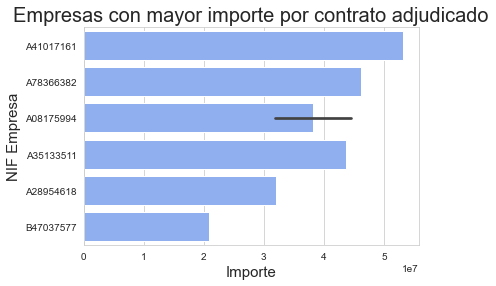

<Figure size 432x288 with 0 Axes>

In [21]:
sns.barplot(data=mayores_importes_contratos_solo_nif, y='adjudicataria_nif', x='importe_ofertado', color='#80aaff')
plt.title('Empresas con mayor importe por contrato adjudicado', fontsize=20)
plt.xlabel('Importe', fontsize=15)
plt.ylabel('NIF Empresa', fontsize=15)
plt.show()
plt.clf()

Las empresas con mayor importe por contrato adjudicado y formalizado:

| NIF     | Nombre de la empresa                          | Importe ofertado (millones) |
|--------:|-----------------------------------------------|-----------------------------|
|A41017161|FAASA AVIACION SA                              |          53,12              |
|A78366382|SACYR SA; SOCIEDAD ANONIMA CAMINOS Y REGADIOS  |          46,14              |
|A08175994|ACCIONA FACILITY SERVICES SA                   |          44,47              |
|A35133511|TRANSPORTES AEREOS SANITARIOS ISLEÑOS SAU      |          43,65              |
|A28954618|INICIATIVAS DE MEDIOS SA                       |          32,00              |
|A08175994|ACCIONA FACILITY SERVICES SA                   |          31,86              |
|B47037577|SAMYL FACILITY SERVICES SL                     |          20,91              |

Ahora vamos a ver cuales son las empresas cuya suma del importe de contratos ofertados es la mayor. Para ello, vamos a agrupar las empresas por su NIF según la suma de importes ofertados.

In [22]:
adjudicatarias_por_importes = df.groupby(df.adjudicataria_nif)['importe_ofertado'].sum().reset_index()

In [23]:
adjudicatarias_por_importes = adjudicatarias_por_importes.rename(columns={'importe_ofertado':'suma_importes_ofertados'})

In [24]:
mayores_adjudicatarias_suma_importes = adjudicatarias_por_importes.sort_values(by='suma_importes_ofertados', ascending=False).head(10).reset_index(drop=True)
mayores_adjudicatarias_suma_importes

,adjudicataria_nif,suma_importes_ofertados
0,A35133511,1.208645e+08
1,281650,8.926544e+07
2,249240,8.607374e+07
3,A08175994,7.634748e+07
4,A28925899,6.975276e+07
5,A78366382,6.014944e+07
6,A41017161,5.312985e+07
7,A08011074,5.081439e+07
8,A08023145,4.130005e+07
9,286443,4.011100e+07


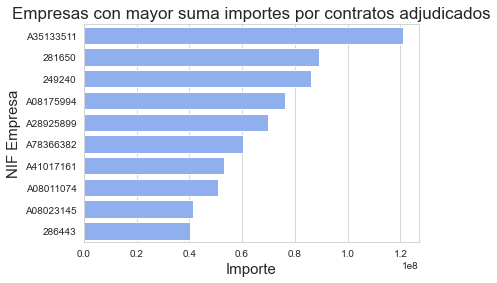

<Figure size 432x288 with 0 Axes>

In [25]:
sns.barplot(data=mayores_adjudicatarias_suma_importes, y='adjudicataria_nif', x='suma_importes_ofertados', color='#80aaff')
plt.title('Empresas con mayor suma importes por contratos adjudicados', fontsize=17)
plt.xlabel('Importe', fontsize=15)
plt.ylabel('NIF Empresa', fontsize=15)
plt.show()
plt.clf()

Nos sucede lo mismo que en el caso anterior por lo que volvemos a eliminar los resultados que no muestren un NIF en la variable "adjudicataria_nif".

In [26]:
patron = r'^[A-Za-z]\d{8}$'
    
# Lo guardamos en una variable que contiene el df filtrado:
mayores_adjudicatarias_suma_importes_solo_nif = mayores_adjudicatarias_suma_importes[
    mayores_adjudicatarias_suma_importes['adjudicataria_nif'].str.contains(patron)].reset_index(drop=True)

mayores_adjudicatarias_suma_importes_solo_nif

,adjudicataria_nif,suma_importes_ofertados
0,A35133511,1.208645e+08
1,A08175994,7.634748e+07
2,A28925899,6.975276e+07
3,A78366382,6.014944e+07
4,A41017161,5.312985e+07
5,A08011074,5.081439e+07
6,A08023145,4.130005e+07


Visulizamos los datos.

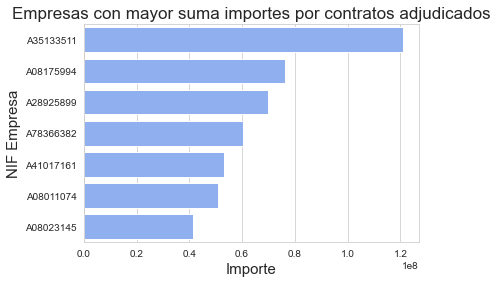

<Figure size 432x288 with 0 Axes>

In [27]:
sns.barplot(data=mayores_adjudicatarias_suma_importes_solo_nif, y='adjudicataria_nif', x='suma_importes_ofertados', color='#80aaff')
plt.title('Empresas con mayor suma importes por contratos adjudicados', fontsize=17)
plt.xlabel('Importe', fontsize=15)
plt.ylabel('NIF Empresa', fontsize=15)
plt.show()
plt.clf()

Las empresas con mayor suma de importes de contratos adjudicados y formalizados:

| NIF     | Nombre de la empresa                          | Importe ofertado (millones) |
|--------:|-----------------------------------------------|-----------------------------|
|A35133511|TRANSPORTES AEREOS SANITARIOS ISLEÑOS SAU      |         120,86              |
|A08175994|ACCIONA FACILITY SERVICES SA                   |          76,34              |
|A28925899|JANSSEN FARMACEUTICA SA                        |          69,75              |
|A78366382|SACYR SA; SOCIEDAD ANONIMA CAMINOS Y REGADIOS  |          60,14              |
|A41017161|FAASA AVIACION SA                              |          53,12              |
|A08011074|NOVARTIS FARMACEUTICA SAU                      |          50,81              |
|A08023145|ROCHE FARMA SA                                 |          41,30              |

La suma de los importes ofertados de todos los contratos adjudicados a las siete empresas con mayores valores suponen casi un 18% de la suma total de los importes ofertados. Es decir, solamente 7 empresas disponen de casi el 18% del importe de todos los contratos adjudicados.

In [28]:
round(((mayores_adjudicatarias_suma_importes_solo_nif.suma_importes_ofertados.sum()) / (df.importe_ofertado.sum())) * 100, 1)

17.9

### ¿Qué empresas han obtenido el mayor número de contratos adjudicados y cuál es su porcentaje respecto al total? <a class="anchor" id="pregunta4"></a>

Ahora vamos a agrupar las empresas por número de NIF, respecto al número de contratos de cada una. El número de contratos podemos calcularlo a traves del método `"count"` de la libreria de Pandas.

In [29]:
adjudicatarias_por_numero_contratos = df.groupby(df.adjudicataria_nif)['importe_ofertado'].count().reset_index()

In [30]:
adjudicatarias_por_numero_contratos = adjudicatarias_por_numero_contratos.rename(columns={'importe_ofertado':'numero_contratos'})

In [31]:
mayores_adjudicatarias_por_numero_contratos = adjudicatarias_por_numero_contratos[adjudicatarias_por_numero_contratos.adjudicataria_nif != '_U']  \
    .sort_values(by='numero_contratos', ascending=False)  \
    .head(10).reset_index(drop=True)
mayores_adjudicatarias_por_numero_contratos

,adjudicataria_nif,numero_contratos
0,A08011074,406
1,B35099506,374
2,A28925899,312
3,A28456820,282
4,A08163586,259
5,A08023145,257
6,B28089225,231
7,A35119015,222
8,B38095469,193
9,A28211092,191


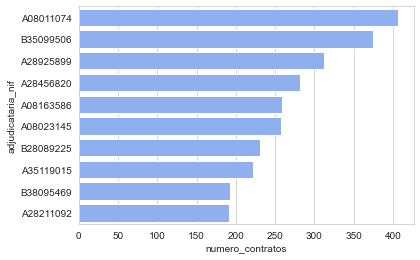

<Figure size 432x288 with 0 Axes>

In [32]:
sns.barplot(data=mayores_adjudicatarias_por_numero_contratos, y='adjudicataria_nif', x='numero_contratos', color='#80aaff')
plt.show()
plt.clf()

Las empresas con mayor número de contratos adjudicados y formalizados:

| NIF     | Nombre de la empresa                          | Número de contratos         |
|--------:|-----------------------------------------------|-----------------------------|
|A08011074|NOVARTIS FARMACEUTICA SAU                      |         406                 |
|B35099506|FERRETERIA GERMAN MEDINA SL                    |         374                 |
|A28925899|JANSSEN FARMACEUTICA SA                        |         312                 |
|A28456820|LABORATORIOS NORMON SA                         |         282                 |
|A08163586|SANOFI-AVENTIS, S.A                            |         259                 |
|A08023145|ROCHE FARMA SA                                 |         257                 |
|B28089225|PFIZER SL                                      |         231                 |
|A35119015|ACJ SA                                         |         222                 |
|B38095469|BIOSIGMA SL                                    |         193                 |
|A28211092|MERCK SHARP & DOHME DE ESPAÑA SA               |         191                 |

La empresa con mayor contratos adjudicados es Novartis Farmaceutica SAU con 406 sobre un total de 42831, representando casi el 1%.

##### Resumen <a class="anchor" id="resumen"></a>

- Hay un total de 42.831 adjudicados y aproximadamente 9.268 empresas distintas (es aproximado porque algunos contratos no han llegado a fomarlizarse y no tienen un NIF definivo asignado).


- Los contratos adjudicados anualmente desde 2020 hasta el primer trimestre de 2023 son 15.866, 13.691, 10.676, 2.598 respectivamente.


- Se estudia la distribución de la variable "importe_ofertado". Llegamos a la conclusión de que la distribución esta fuertemente sesgada a la derecha, por lo que se aplica una transformación logaritmica y con ello se consigue una distribución normal para poder aplicar técnicas estadísticas que requieren dicha distribución.


- Las empresas con mayor importe por contrato adjudicado y formalizado:

| NIF     | Nombre de la empresa                          | Importe ofertado (millones) |
|--------:|-----------------------------------------------|-----------------------------|
|A41017161|FAASA AVIACION SA                              |          53,12              |
|A78366382|SACYR SA; SOCIEDAD ANONIMA CAMINOS Y REGADIOS  |          46,14              |
|A08175994|ACCIONA FACILITY SERVICES SA                   |          44,47              |
|A35133511|TRANSPORTES AEREOS SANITARIOS ISLEÑOS SAU      |          43,65              |
|A28954618|INICIATIVAS DE MEDIOS SA                       |          32,00              |
|A08175994|ACCIONA FACILITY SERVICES SA                   |          31,86              |
|B47037577|SAMYL FACILITY SERVICES SL                     |          20,91              |


- Las empresas con mayor suma de importes de contratos adjudicados y formalizados:

| NIF     | Nombre de la empresa                          | Importe ofertado (millones) |
|--------:|-----------------------------------------------|-----------------------------|
|A35133511|TRANSPORTES AEREOS SANITARIOS ISLEÑOS SAU      |         120,86              |
|A08175994|ACCIONA FACILITY SERVICES SA                   |          76,34              |
|A28925899|JANSSEN FARMACEUTICA SA                        |          69,75              |
|A78366382|SACYR SA; SOCIEDAD ANONIMA CAMINOS Y REGADIOS  |          60,14              |
|A41017161|FAASA AVIACION SA                              |          53,12              |
|A08011074|NOVARTIS FARMACEUTICA SAU                      |          50,81              |
|A08023145|ROCHE FARMA SA                                 |          41,30              |


- Las empresas con mayor número de contratos adjudicados y formalizados:

| NIF     | Nombre de la empresa                          | Número de contratos         |
|--------:|-----------------------------------------------|-----------------------------|
|A08011074|NOVARTIS FARMACEUTICA SAU                      |         406                 |
|B35099506|FERRETERIA GERMAN MEDINA SL                    |         374                 |
|A28925899|JANSSEN FARMACEUTICA SA                        |         312                 |
|A28456820|LABORATORIOS NORMON SA                         |         282                 |
|A08163586|SANOFI-AVENTIS, S.A                            |         259                 |
|A08023145|ROCHE FARMA SA                                 |         257                 |
|B28089225|PFIZER SL                                      |         231                 |
|A35119015|ACJ SA                                         |         222                 |
|B38095469|BIOSIGMA SL                                    |         193                 |
|A28211092|MERCK SHARP & DOHME DE ESPAÑA SA               |         191                 |



##### Consideraciones finales <a class="anchor" id="consideraciones"></a>

La tabla de datos aun contiene infomación que podemos analizar para extraer más conclusiones, por ejemplo, podríamos plantear para un futuro:

- ¿Cuál es el objeto de contrato más frecuente? ¿Cúal es su porcentaje sobre el total? ¿Cuál es el importe ofertado más elevado por objeto de contrato?

- Se podrían plantear las mismas preguntas para otras variables como `entidad_adjudicadora`, `procedimiento_contratacion`, `tramitacion_tipo`.

Sin embargo, el proposito de este poyecto solamente es demostrar como se pueden ordenar y limpiar un conjunto de datos para obetener la información que necesitamos usando la librería `pandas` y realizar algunas representaciones gráficas con `matplotlib` y `seaborn`.
